In [1]:
import pandas as pd
import seaborn as sns
import numpy as np

In [2]:
df = pd.read_csv('Churn_Modelling.csv')

In [4]:
df.columns

Index(['RowNumber', 'CustomerId', 'Surname', 'CreditScore', 'Geography',
       'Gender', 'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [11]:

df.drop(columns=[ 'RowNumber','CustomerId','Surname','Gender','Geography'], inplace=True)

In [15]:
# input data
x = df[['CreditScore','Age','Tenure','Balance','NumOfProducts','HasCrCard','IsActiveMember','EstimatedSalary']]
# output data
y = df['Exited']

In [19]:
# When we have to do point of improvement
#from imblearn.over_sampling import RandomOverSampler
#ros = RandomOverSampler(random_state=0)
#x_res,y_res = ros.fit_resample(x,y)

In [20]:
#Normalize data
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
x_scaled = scaler.fit_transform(x) # use x_res when resampled

In [21]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test = train_test_split(x_scaled,y,random_state = 0,test_size = 0.25) #pass y_res when done balancing
from sklearn.neural_network import MLPClassifier
ann = MLPClassifier(hidden_layer_sizes=(100,100,100),random_state=0,max_iter=100,activation='relu')
ann.fit(x_train,y_train)
y_pred = ann.predict(x_test)

C:\Users\Arpit\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (100) reached and the optimization hasn't converged yet.
  warnings.warn(


0.854

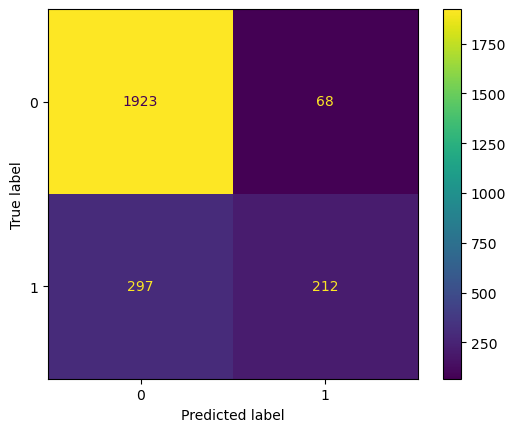

In [22]:
from sklearn.metrics import ConfusionMatrixDisplay,accuracy_score,classification_report
ConfusionMatrixDisplay.from_predictions(y_test,y_pred)
accuracy_score(y_test,y_pred)